Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Darina Petrova| 12230205 | 16.10.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 &ndash; Tabular Data, Dimensionality Reduction and Clustering</h2>

<b>Authors:</b> Brandstetter, Schäfl, Schörgenhumer<br>
<b>Date:</b> 02-10-2023

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u1_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u1_utils.py</code> need to be installed.

<h2>Exercise 1</h2>

<div class="alert alert-warning">
    <b>Exercise 1.1. [3 Points]</b>
    <ul>
        <li>Import the same modules as discussed in the lecture notebook.</li>
    </ul>
</div>

In [31]:
import u1_utils as u1
import numpy as np
import seaborn as sns

sns.set()
u1.setup_jupyter()

<div class="alert alert-warning">
    <b>Exercise 1.2. [2 Points]</b>
    <ul>
        <li>Check if your model versions are correct.</li>
    </ul>
</div>

In [32]:
u1.check_module_versions()

Installed Python version: 3.10 (✓)
Installed numpy version: 1.26.0 (✓)
Installed pandas version: 2.1.1 (✓)
Installed scikit-learn version: 1.3.1 (✓)
Installed matplotlib version: 3.8.0 (✓)
Installed seaborn version: 0.13.0 (✓)


<h2>Exercise 2</h2>

We will start with a classical dataset, the "breast cancer wisconsin (diagnostic) dataset". It is a binary classification task (malignant vs. benign) using 30-dimensional samples whose features were extracted from digitized images of a fine needle aspirate (FNA) of breast masses. For more details, see [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset). Use the provided functions in `u1_utils.py` to solve the following exercises.

<div class="alert alert-warning">
    <b>Exercise 2.1. [5 Points]</b>
    <ul>
        <li>Load the breast cancer dataset with <code>u1.load_breast_cancer()</code>.</li>
    </ul>
</div>

In [33]:
breast_cancer_data = u1.load_breast_cancer()

<div class="alert alert-warning">
    <b>Exercise 2.2. [5 Points]</b>
    <ul>
        <li>Display the dataframe of the breast cancer dataset.</li>
    </ul>
</div>

In [34]:
breast_cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<div class="alert alert-warning">
    <b>Exercise 2.3. [5 Points]</b>
    <ul>
        <li>How many dimensions does the dataset have, i.e., how long is the feature vector of each sample (not counting the class label column <code>diagnosis</code>)?</li>
        <li>What are the values of the two classes?</li>
        <li>How many samples are there in total?</li>
    </ul>
</div>

- 30 dimensions
- values are 0 and 1
- 569 samples total

<h2>Exercise 3</h2>

<div class="alert alert-warning">
    <b>Exercise 3.1. [10 Points]</b>
    <ul>
        <li>Make a feature correlation plot of all features representing the mean of the various metrics, i.e, "mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension". Color the data points according to their "diagnosis".</li>
    </ul>
</div>

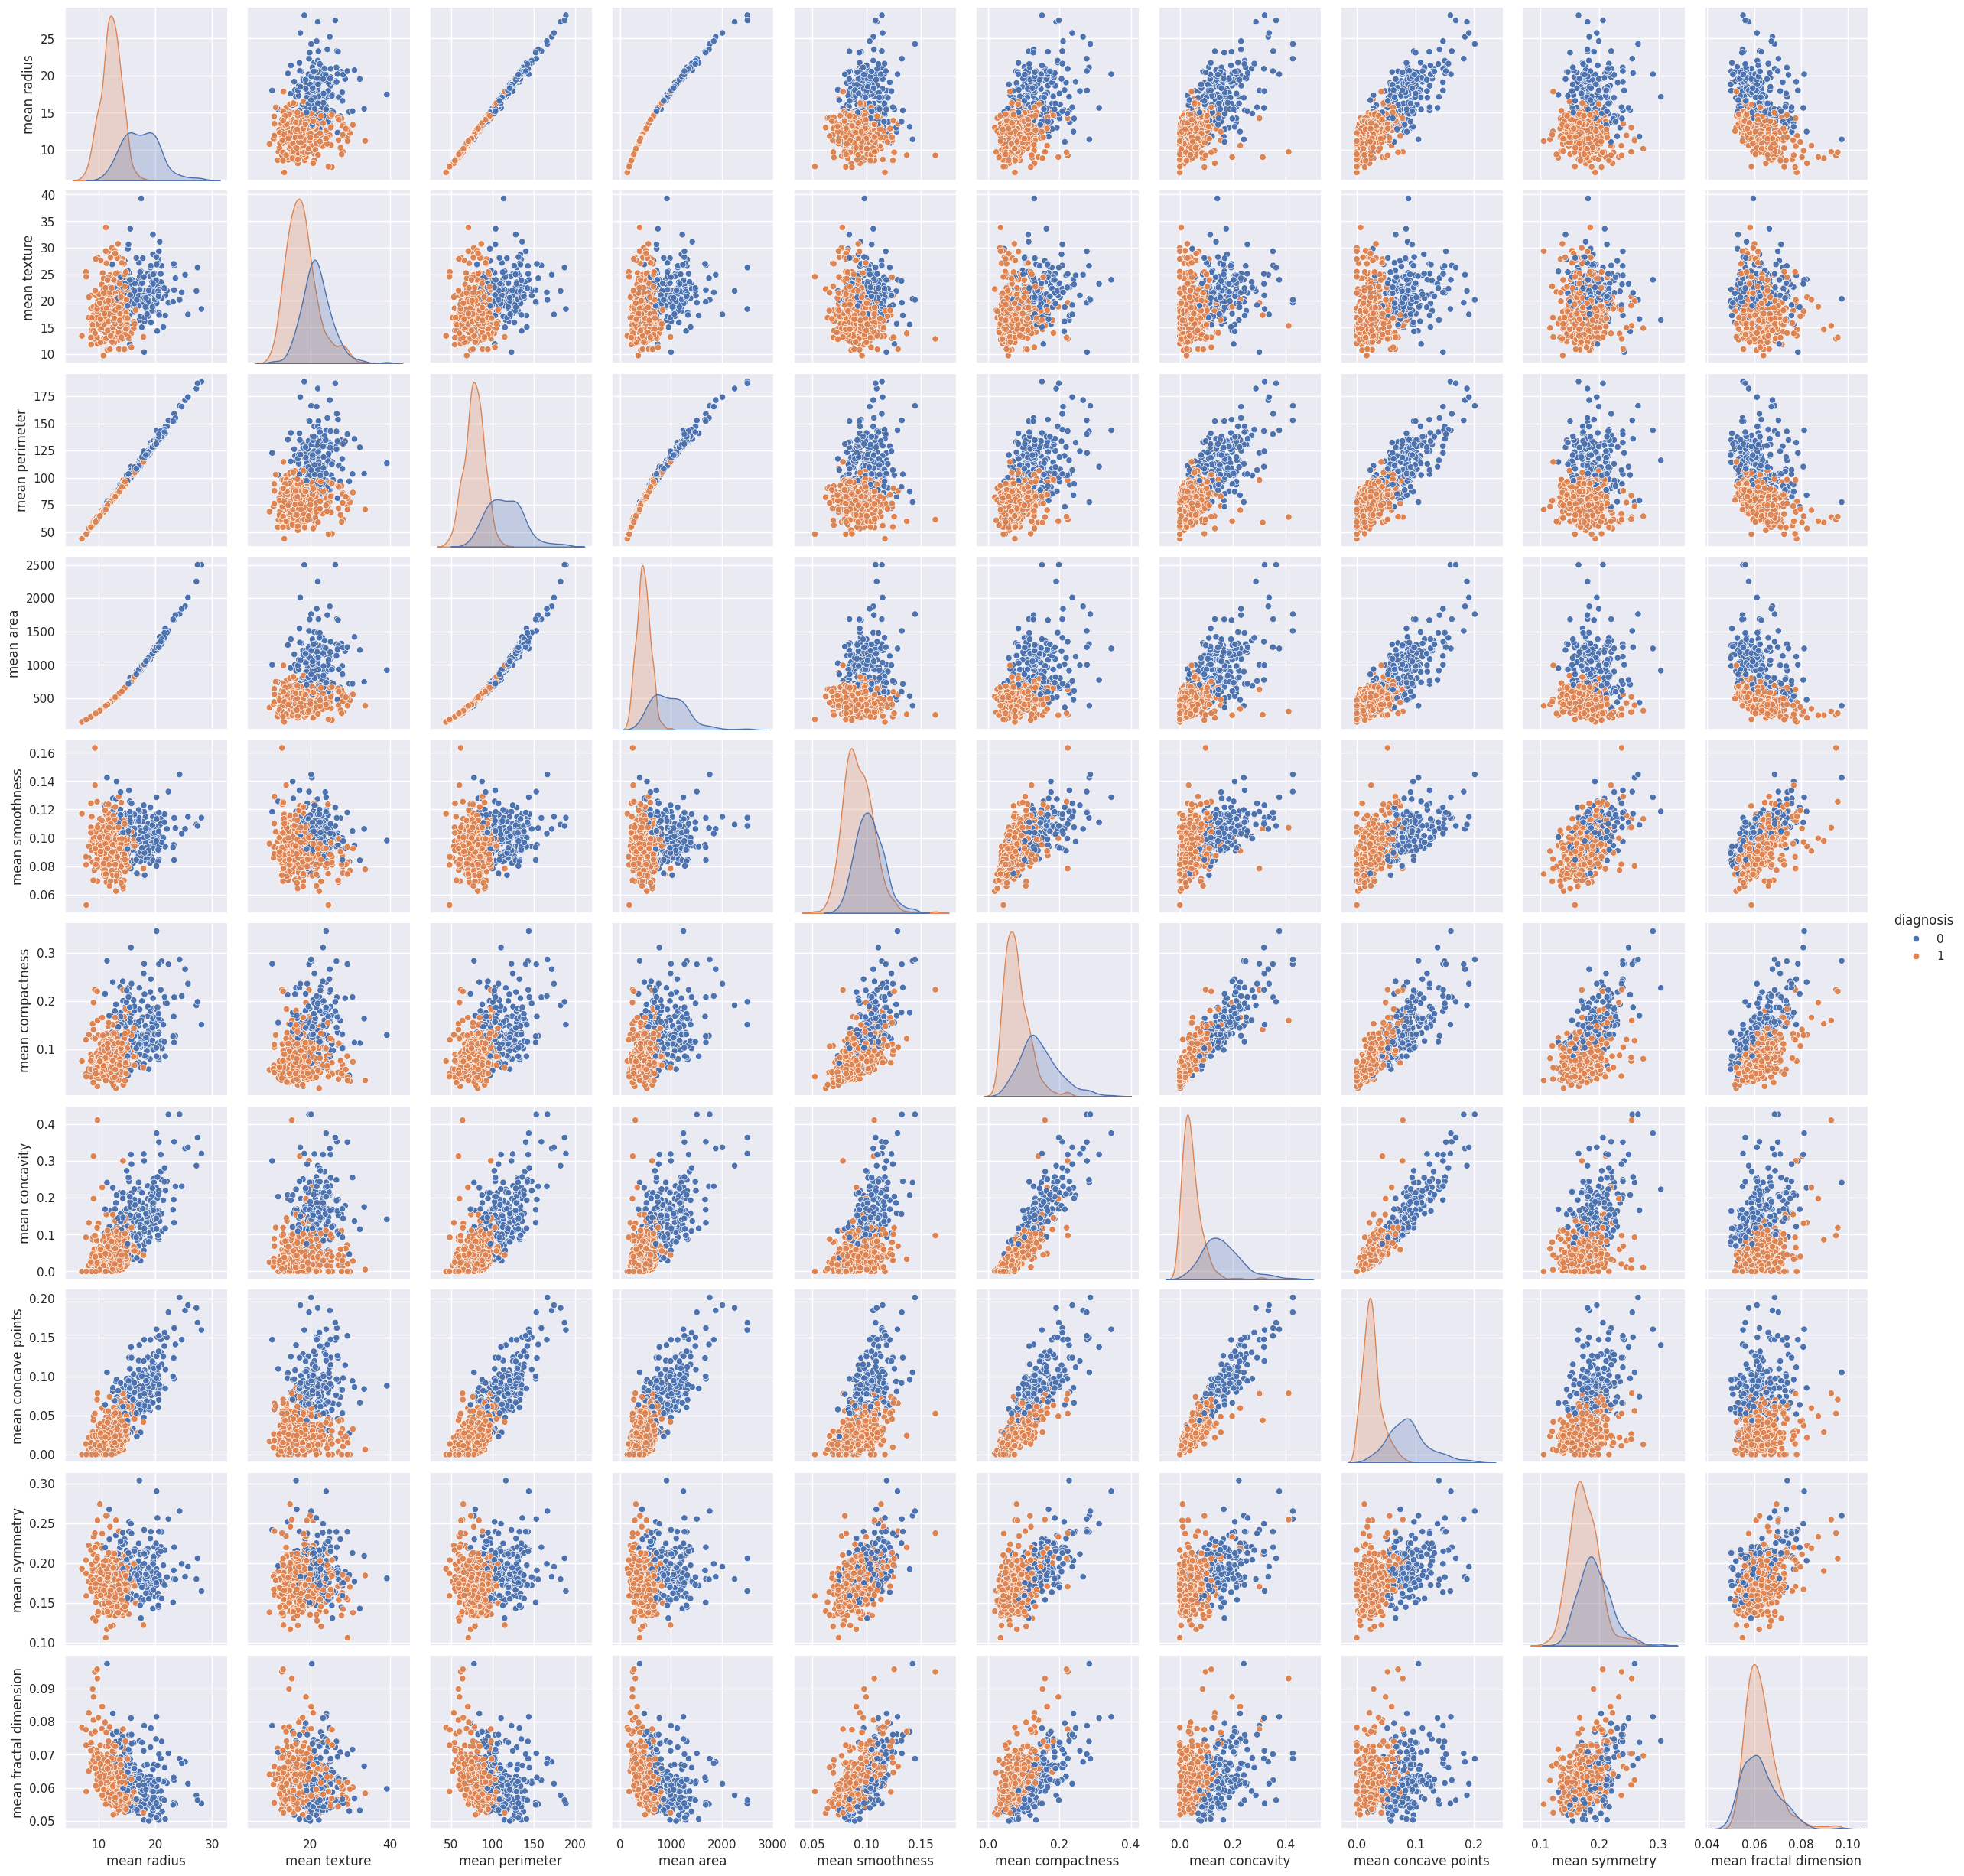

In [35]:
u1.plot_features(data=breast_cancer_data, features=["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension"], target_column="diagnosis")

<div class="alert alert-warning">
    <b>Exercise 3.2. [12 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the features via PCA to 2 dimensions and plot the result.</li>
        <li>Note: Setting the seed for the random number generator <code>np.random.seed(seed=...)</code> is not necessary but useful if you want to ensure reproducible results.</li>
    </ul>
</div>

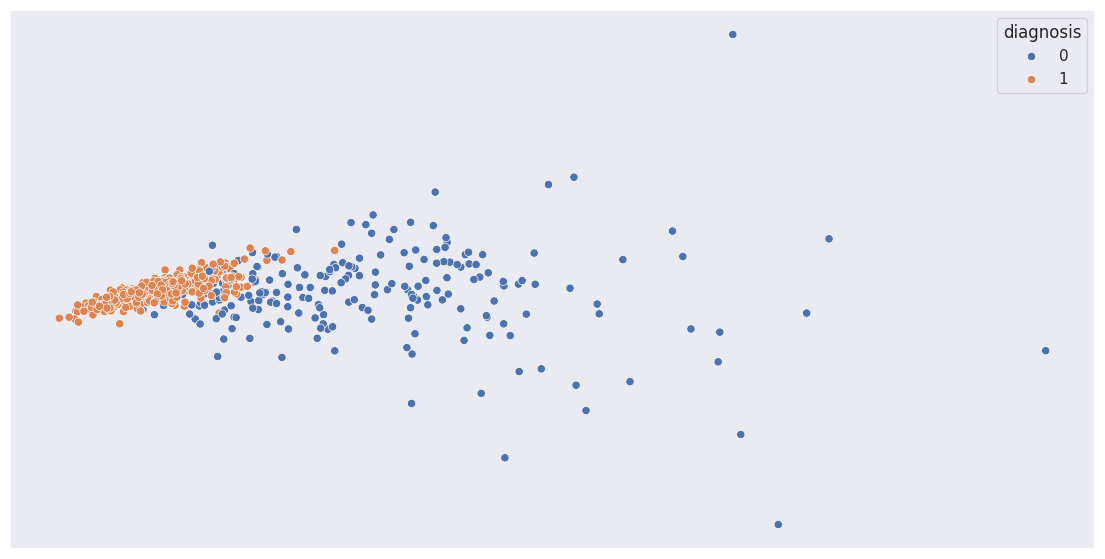

In [36]:
np.random.seed(seed=22)

breast_cancer_data_pca = u1.apply_pca(n_components=2, data=breast_cancer_data, target_column="diagnosis")
u1.plot_points_2d(data=breast_cancer_data_pca, target_column="diagnosis", figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 3.3. [12 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the features via t-SNE to 2 dimensions and plot the result.</li>
        <li>Play around with the perplexity and find a value that yields a visually satisfying output (where the two classes are separable to some degree). Try values in the range $[5, 50]$.</li>
        <li>Note: Setting the seed for the random number generator <code>np.random.seed(seed=...)</code> is not necessary but useful if you want to ensure reproducible results.</li>
    </ul>
</div>

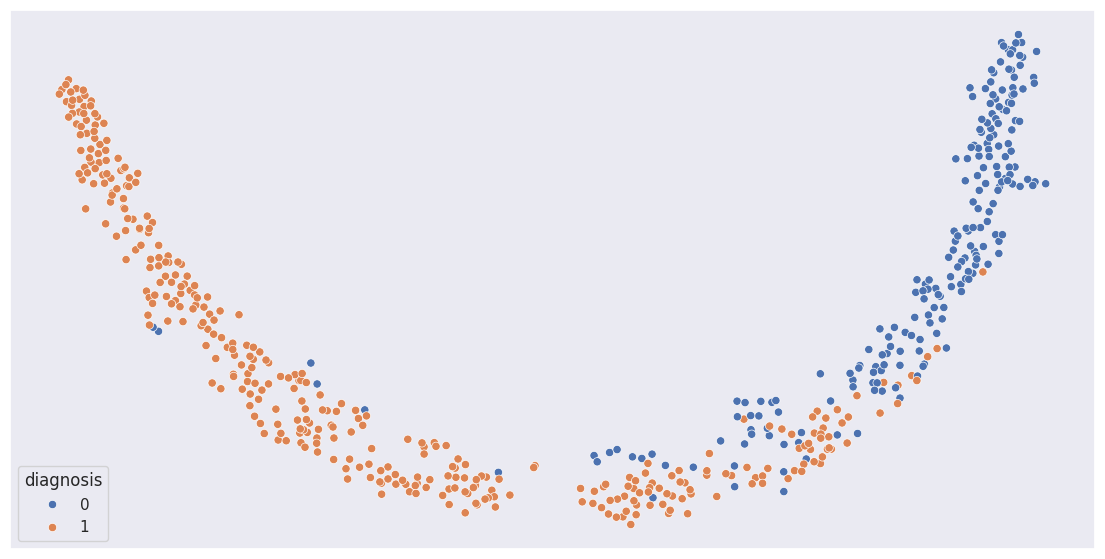

In [37]:
np.random.seed(seed=22)

breast_cancer_data_tsne = u1.apply_tsne(n_components=2, data=breast_cancer_data, perplexity=39.0, target_column="diagnosis")
u1.plot_points_2d(data=breast_cancer_data_tsne, target_column="diagnosis", figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 3.4. [5 Points]</b>
    <ul>
        <li>Given the above visualizations, what (if anything) can you tell about the separability of the two classes?</li>
    </ul>
</div>

From the PCA plot - both diagnoses are contained within a conical space, the benign diagnoses (1) cluster together quite strongly, and the malignant (0) are dispersed around that space.

From the tSNE plot - both diagnoses form half-arches at the two sides of the plot, with both being slightly scattered to where the other class is prevalent.

In conclusion, the classes are somewhat separable, but do not strongly cluster apart from the other one.

<h2>Exercise 4</h2>

<div class="alert alert-warning">
    <b>Exercise 4.1. [13 Points]</b>
    <ul>
        <li>Use $k$-Means clustering to cluster the original data and then plot the predicted clusters using the <b>t-SNE</b> data from above. Use a sensible value for the number of cluster centers $k$.</li>
        <li>Note: Setting the seed for the random number generator <code>np.random.seed(seed=...)</code> is not necessary but useful if you want to ensure reproducible results.</li>
    </ul>
</div>

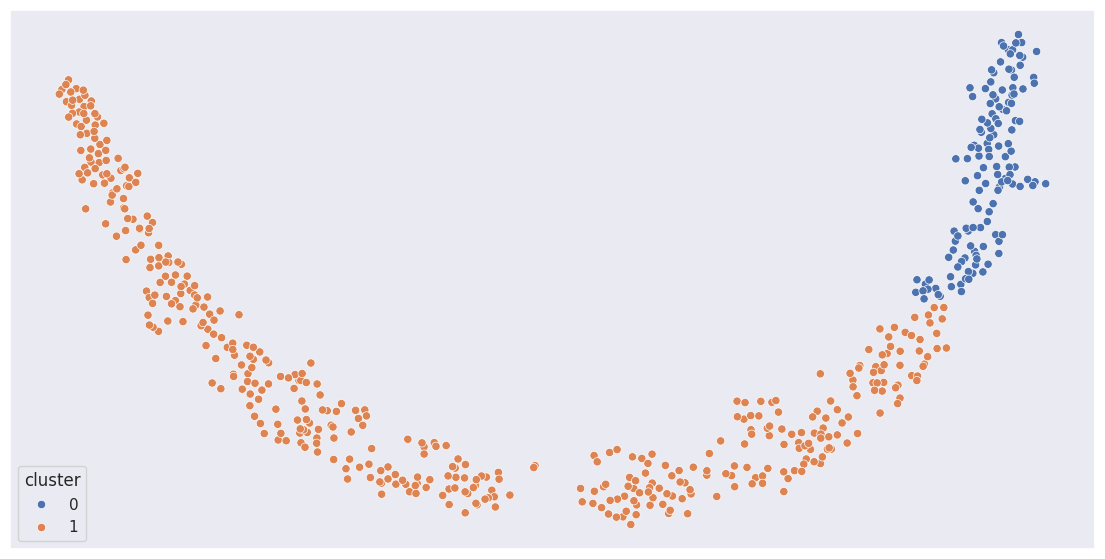

In [38]:
np.random.seed(seed=22)

breast_cancer_data_k_means = breast_cancer_data_tsne.copy()
breast_cancer_data_k_means = breast_cancer_data_k_means.rename(columns={"diagnosis": "cluster"})
breast_cancer_data_k_means["cluster"] = u1.apply_k_means(k=2, data=breast_cancer_data.drop(columns="diagnosis"))
u1.plot_points_2d(data=breast_cancer_data_k_means, target_column="cluster", figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 4.2. [5 Points]</b>
    <ul>
        <li>Copy the code from above to repeat the previous task but with $k + 1$ clusters.</li>
        <li>Note: Setting the seed for the random number generator <code>np.random.seed(seed=...)</code> is not necessary but useful if you want to ensure reproducible results.</li>
    </ul>
</div>

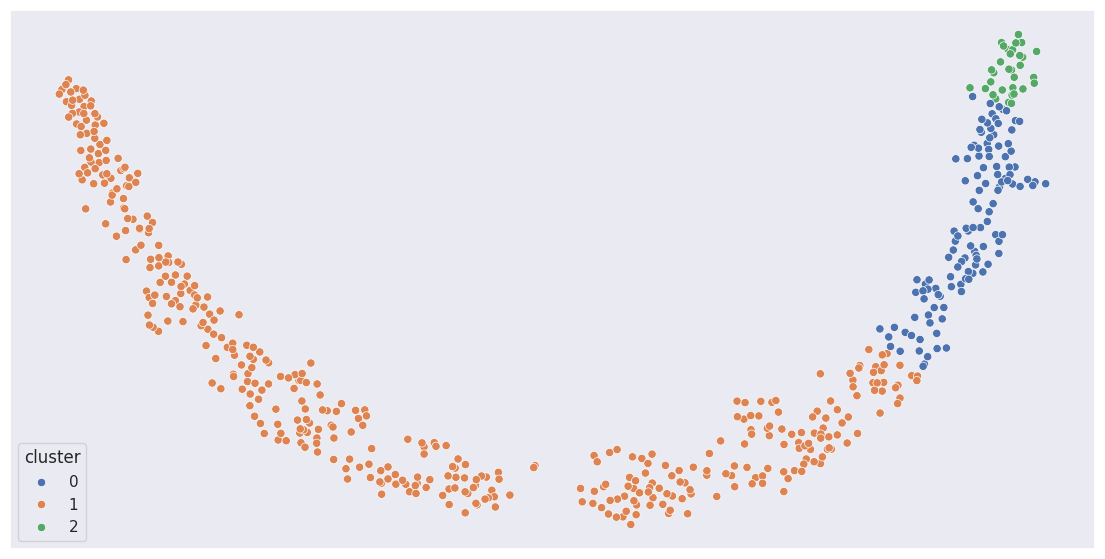

In [39]:
np.random.seed(seed=22)

breast_cancer_data_k_means = breast_cancer_data_k_means.rename(columns={"diagnosis": "cluster"})
breast_cancer_data_k_means["cluster"] = u1.apply_k_means(k=3, data=breast_cancer_data.drop(columns="diagnosis"))
u1.plot_points_2d(data=breast_cancer_data_k_means, target_column="cluster", figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 4.3. [5 Points]</b>
    <ul>
        <li>Given the $k + 1$ visualization above, what do you observe?</li>
    </ul>
</div>

The k-Means algorithm determined a new cluster class, that is smaller than the two before. 
Starting from cluster 0, each next cluster is about a third of the size of the previous one.

<div class="alert alert-warning">
    <b>Exercise 4.4. [13 Points]</b>
    <ul>
        <li>Use Affinity Propagation to cluster the original data and then plot the predicted clusters using the <b>PCA</b> data from above.</li>
        <li>Note: Setting the seed for the random number generator <code>np.random.seed(seed=...)</code> is not necessary but useful if you want to ensure reproducible results.</li>
    </ul>
</div>

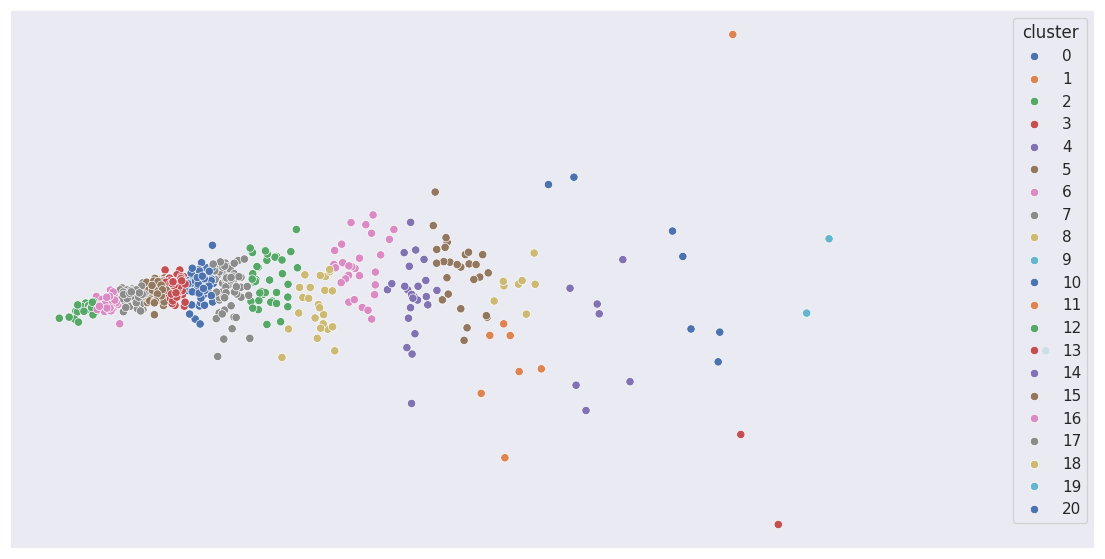

In [40]:
np.random.seed(seed=22)

breast_cancer_data_affinity_propagation = breast_cancer_data_pca.copy()
breast_cancer_data_affinity_propagation = breast_cancer_data_affinity_propagation.rename(columns={"diagnosis": "cluster"})
breast_cancer_data_affinity_propagation["cluster"] = u1.apply_affinity_propagation(data=breast_cancer_data.drop(columns="diagnosis"))
u1.plot_points_2d(data=breast_cancer_data_affinity_propagation, target_column="cluster", figsize=(14, 7))

<div class="alert alert-warning">
    <b>Exercise 4.5. [5 Points]</b>
    <ul>
        <li>What do you observe?</li>
    </ul>
</div>

The algorithm determined 20 cluster classes, each one being in a sort of 'strip' of the plot, with the 'strips' becoming wider as the points become more and more scattered. Instead of dividing the classes into 0 - clustered in one place, and 1 - dispersed around the plot, the algorithm determined that the clusters are formed by data points in relatively close proximity to one another.